In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = {
    "weather":['Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
    ,"temp":['Hot', 'Hot','Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool','Mild','Mild','Mild','Hot','Mild']
    ,"play":['No', 'No', 'Yes','Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
data1 = pd.DataFrame(data)
data1

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder

lew = LabelEncoder()
let =LabelEncoder()
lep =LabelEncoder()

data1['weather'] = lew.fit_transform(data1['weather'])
data1['temp'] = let.fit_transform(data1['temp'])
data1['play'] = lep.fit_transform(data1['play'])


In [13]:
data1

,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [9]:
X = data1[['weather', 'temp']]
y = data1['play']

In [11]:
from sklearn.naive_bayes import CategoricalNB



model = CategoricalNB()
model.fit(X,y)

CategoricalNB()

In [12]:
model.score(X,y)

0.7857142857142857

In [17]:
model.predict_proba([[1,0]])

/Users/yjhouma/opt/anaconda3/envs/hacktiv8/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([[0.31914894, 0.68085106]])

## Naive Bayes Multiclass

In [18]:
from sklearn import datasets

In [22]:
wine_data = datasets.load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [25]:
X = wine_data.data
y = wine_data.target
data2 = pd.DataFrame(X,columns=wine_data.feature_names)

In [27]:
import seaborn as sns

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data2,y ,test_size=.3, random_state=103)

In [49]:
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)
nbmodel.score(X_train,y_train)

0.9919354838709677

In [50]:
nbmodel.score(X_test,y_test)

0.9444444444444444

In [52]:
y_pred_prob = nbmodel.predict_proba(X_test)

In [54]:
log_loss(y_test,y_pred=y_pred_prob)

0.16006981961117722

## Decission Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtmodel = DecisionTreeClassifier(random_state=10)

dtmodel.fit(X_train,y_train)
dtmodel.score(X_train,y_train)

1.0

In [72]:
# dtmodel.fit(X_train,y_train)
dtmodel.score(X_test,y_test)

0.9074074074074074

In [61]:
from sklearn.model_selection import cross_val_score

In [73]:
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

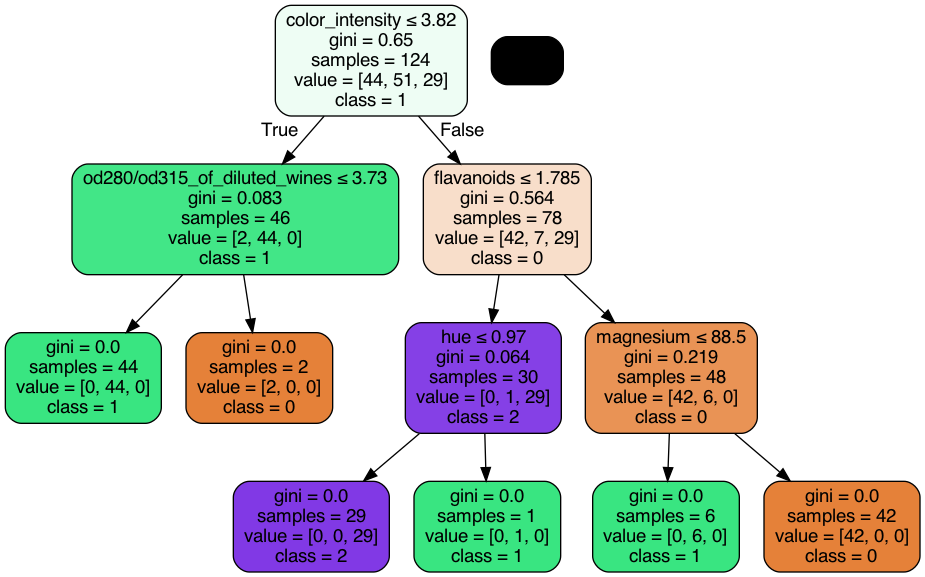

In [74]:
dot_data = StringIO()

export_graphviz(
    decision_tree=dtmodel,
    out_file=dot_data,
    class_names=['0','1','2'],
    feature_names=list(data2.columns),
    filled=True,
    rounded=True,
    special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [83]:
dtmodel2 = DecisionTreeClassifier(random_state=10,max_depth=2)

dtmodel2.fit(X_train,y_train)
print("Train Score: ", dtmodel2.score(X_train,y_train))
print("Test Score: ", dtmodel2.score(X_test,y_test))

Train Score:  0.9435483870967742
Test Score:  0.8888888888888888


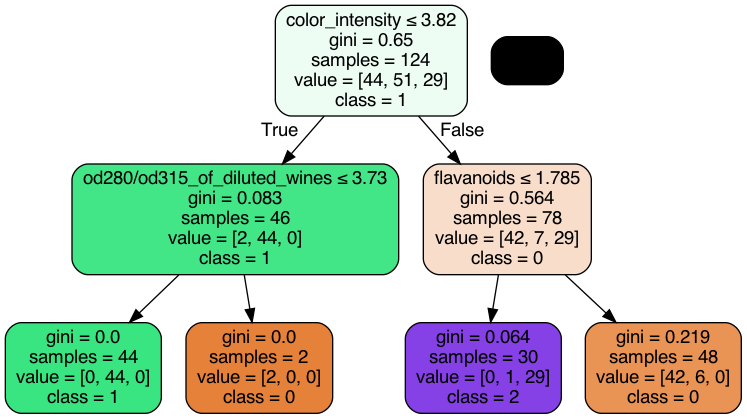

In [78]:
dot_data = StringIO()

export_graphviz(
    decision_tree=dtmodel2,
    out_file=dot_data,
    class_names=['0','1','2'],
    feature_names=list(data2.columns),
    filled=True,
    rounded=True,
    special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
iris_data = datasets.load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [90]:
data3 = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

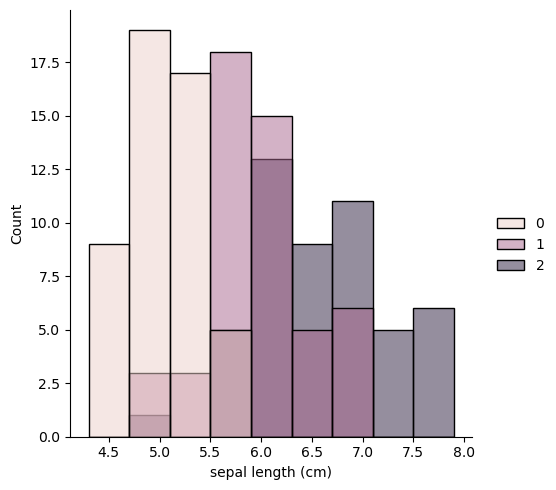

In [94]:
sns.displot(data=data3,x='sepal length (cm)', hue=y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=103)

In [96]:
X_train.shape


(105, 4)

In [97]:
X_test.shape

(45, 4)

In [113]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=10)

In [114]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [115]:
print("Train Score: ", rfmodel.score(X_train,y_train))
print("Test Score: ", rfmodel.score(X_test,y_test))

Train Score:  1.0
Test Score:  1.0


In [121]:
feat_imp = pd.Series(rfmodel.feature_importances_, index=iris_data.feature_names).sort_values(ascending=False)

<Axes: >

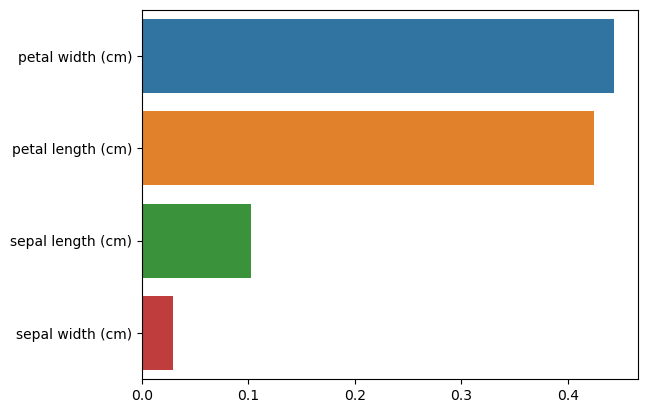

In [122]:
sns.barplot(x=feat_imp,y=feat_imp.index)

In [124]:
nbmodel2 = GaussianNB()

In [130]:
feat_used = ["petal length (cm)", "petal width (cm)"]
nbmodel2.fit(X_train,y_train)

GaussianNB()

In [131]:
nbmodel2.score(X_train,y_train)

0.9333333333333333

In [132]:
nbmodel2.score(X_test,y_test)

1.0

In [133]:
from sklearn.svm import SVC

In [134]:
cancer_data = datasets.load_breast_cancer()

print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [137]:
data4 = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = cancer_data.target

In [136]:
data4


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [139]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data4, y, test_size=0.3, random_state=103)

In [154]:
svcmodel = SVC(C=10.0,kernel='rbf')
svcmodel.fit(X_train, y_train)

SVC(C=10.0)

In [155]:
svcmodel.score(X_train, y_train)

0.9120603015075377

In [156]:
svcmodel.score(X_test, y_test)

0.9415204678362573

# Model Selection

In [158]:
data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv")

In [161]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [162]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [163]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [164]:
data['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [165]:
data['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [166]:
# 
data['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [167]:
# 
data['Loan_ID'].nunique()


614

In [171]:
data['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [169]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [176]:
data.loc[:,['LoanAmount', 'Loan_Amount_Term']]= data.loc[:,['LoanAmount', 'Loan_Amount_Term']].fillna(data.loc[:,['LoanAmount', 'Loan_Amount_Term']].mean())

In [177]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
data.Gender.fillna("Unknown",inplace=True)
data.Married.fillna("Unknown",inplace=True)

In [180]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [182]:
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0],inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)




In [187]:
data.Dependents[0]

'0'

In [188]:
def encode_depend(X):
    if X == '0':
        return 0
    elif X == '1':
        return 1
    elif X == '2':
        return 2
    else:
        return 3

In [192]:
data.loc[:, "Dependents"] = data.Dependents.apply(encode_depend)

/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_4439/2086259281.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Dependents"] = data.Dependents.apply(encode_depend)


In [195]:
data["Education"] = (data["Education"] == 'Graduate').astype(int)

In [197]:
data["Self_Employed"] = (data["Self_Employed"] == 'Yes').astype(int)
data["Loan_Status"] = (data["Loan_Status"] == 'Y').astype(int)



In [198]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [201]:
ct = ColumnTransformer(
    [
        ("onehot_categorical", OneHotEncoder(),["Gender","Married","Property_Area"]),
        ("Minmax", MinMaxScaler(), ['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Amount_Term'])
    ]
)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Loan_Status",axis=1), data.Loan_Status, test_size=0.3, random_state=103)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


lrmodel = LogisticRegression()
dtmodel = DecisionTreeClassifier()
nbmodel = GaussianNB()
rfmodel = RandomForestClassifier(n_estimators=100)
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [209]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [211]:
lrmodel.fit(X_train,y_train)
dtmodel.fit(X_train,y_train)
nbmodel.fit(X_train,y_train)
rfmodel.fit(X_train,y_train)
knnmodel.fit(X_train,y_train)



KNeighborsClassifier()

In [213]:
print("Linear Model Score: ", lrmodel.score(X_test,y_test))
print("DT Model Score: ", dtmodel.score(X_test,y_test))
print("Naive Bayes Model Score: ", nbmodel.score(X_test,y_test))
print("RF Model Score: ", rfmodel.score(X_test,y_test))
print("kNN Model Score: ", knnmodel.score(X_test,y_test))




Linear Model Score:  0.6216216216216216
DT Model Score:  0.6432432432432432
Naive Bayes Model Score:  0.3837837837837838
RF Model Score:  0.6270270270270271
kNN Model Score:  0.6270270270270271
